예시 코드에 나온 워드 클라우드를 연습해보기 위해 새로운 데이터셋을 크롤링해보려 한다.

이번에 아파트 단지 내 헬스장에 새로 등록을 해서 프로틴 구매 욕구가 나날이 늘어나고 있던 참이라 마이프로틴의 제품 리뷰를 크롤링해서 워드 클라우드를 만들어보려 한다.

 1. 제품 리뷰를 크롤링한다
 2. 정규표현식으로 한글만 추린다
 3. 띄어쓰기를 교정한다(PyKospacing)
 4. 형태소로 토큰화한다(okt)
 5. 불용어를 제거한다
 6. 원하는 단어를 Konlpy 사전에 추가한다
 7. 워드클라우드를 그린다

 
 위같은 과정을 거쳐보겠다!

In [2]:
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 3.2 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [3]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 22.3 MB/s eta 0:00:00


In [13]:
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-hi4qirwk
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-hi4qirwk
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit 1f8d11c59ac93525432f164e4c237ece4e298691
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 2.5 MB/s eta 0:00:00
  Created wheel for pykospacing: filename=pykospacing-0.5-py3-none-any.whl size=2268637 sha256=9e15a8a4d3b925de6ba3617552dd0d6754baaf2f7838a20f9f83c3d7084d8794
  Stored in directory: /tmp/pip-ephem-wheel-cache-69q8cdqj/wheels/79/a0/33/16f2cd03d21f76a663f5d69a0b96f0351335385349136fbd03
Successfully built pykospacing
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully

In [2]:
import selenium
from selenium import webdriver
from selenium.webdriver import ActionChains

from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait

from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

import re

import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. 데이터 크롤링하기

In [ ]:
driver = webdriver.Chrome(executable_path = "C:/Users/희준/downloads/chromedriver_win32/chromedriver.exe")

In [ ]:
df = pd.DataFrame()

# 긁어올 클래스는 아래 두 가지(리뷰 제목, 리뷰 내용)
class_name = ['athenaProductReviews_reviewTitle', 'athenaProductReviews_reviewContent']

for i in range(100): # 1~100페이지를 순회하며 크롤링
    url = 'https://www.myprotein.co.kr/sports-nutrition/impact-whey-protein/10530943.reviews?pageNumber={}'.format(i+1)
    driver.get(url)
    driver.implicitly_wait(time_to_wait=5)
    soup = BeautifulSoup(driver.page_source, 'html')
    soup = soup.find(class_="athenaProductReviews_allReviewsContent") # 타겟이 될 class

    diction = {}
    for n in class_name:
        length = len(soup.find_all(class_=n)) # 한 페이지당 리뷰의 개수
        temp = [soup.find_all(class_=n)[k].text.strip() for k in range(0,length)]
        diction[n] = temp
        
    df_ = pd.DataFrame(diction)
    df = pd.concat([df, df_],axis=0)

df.reset_index(drop=True, inplace=True)
df.columns = ['title','content']
df['text'] = df['title']+df['content']

윗 부분까지는 vscode로 진행했다. 코랩에선 웹드라이버가 계속 오류가 나서 vscode로 크롤링을 하고 csv 파일로 만들어 코랩에서 이를 불러왔다.

In [3]:
df = pd.read_csv("/content/drive/MyDrive/sentence/crawl_df.csv")

In [ ]:
df.head()

,Unnamed: 0,title,content,text
0,0,처음 사먹어 보는데 맛있네요,맛이 좋아서 꾸준히 먹고 있습니다.^^,처음 사먹어 보는데 맛있네요맛이 좋아서 꾸준히 먹고 있습니다.^^
1,1,말해 뭐합니까 ㅋㅋㅋ 역시,가성비 갑 제품 + 맛도 다양해서 ㅋㅋㅋ 항상 구매하고 있습니다요! \n\n ...,말해 뭐합니까 ㅋㅋㅋ 역시가성비 갑 제품 + 맛도 다양해서 ㅋㅋㅋ 항상 구매하고 있...
2,2,좋넹요,맛있습니다. 저번에 말차라떼도 먹어봤는데 그것보다 더 나은거 같네요,좋넹요맛있습니다. 저번에 말차라떼도 먹어봤는데 그것보다 더 나은거 같네요
3,3,매우 만족합니다,5키로는 정말 엄청크네요.\n 평점이 좋아서 스트로베리크림으로 주문했는데 좋습...,매우 만족합니다5키로는 정말 엄청크네요.\n 평점이 좋아서 스트로베리크림으로 ...
4,4,마싯어요,약간 달긴 하지만 물에 잘 녹고 가루날림이 거의없어 좋아요,마싯어요약간 달긴 하지만 물에 잘 녹고 가루날림이 거의없어 좋아요


## 2. 정규표현식으로 한글 단어만 남기기

이제 정규표현식으로 한글 단어만 남기고 모두 제외한다.

In [4]:
def extract_hangul(text):
  hangul = re.sub('[^가-힣]', ' ', text)
  return hangul

In [5]:
example = extract_hangul(df['text'][1])
print("전처리 이전: ",df['text'][1])
print("전처리 이후: ",example)

전처리 이전:  말해 뭐합니까 ㅋㅋㅋ 역시가성비 갑 제품 + 맛도 다양해서 ㅋㅋㅋ 항상 구매하고 있습니다요! 

    스트로베리 크림치즈가 가장 맛있었네요!
전처리 이후:  말해 뭐합니까     역시가성비 갑 제품   맛도 다양해서     항상 구매하고 있습니다요        스트로베리 크림치즈가 가장 맛있었네요 


## 3. 띄어쓰기 교정(PyKoSpacing)

`PyKoSpacing`은 띄어쓰기가 되지 않은 문장을 띄어쓰기가 된 문장으로 교정해주는 패키지이다. 앞서 한글 외 다른 문자를 공백으로 치환했는데, 중첩된 공백들도 이 띄어쓰기 교정으로 하나의 공백으로 바꿔줄 수 있다.

In [6]:
from pykospacing import Spacing
spacing = Spacing()

In [7]:
def spacing_text(text):
  spaced_text = spacing(text)
  return spaced_text

In [8]:
spaced = spacing_text(example)
print("전처리 이전: ",example)
print("전처리 이후: ",spaced)

1/1 [==============================] - 1s 896ms/step
전처리 이전:  말해 뭐합니까     역시가성비 갑 제품   맛도 다양해서     항상 구매하고 있습니다요        스트로베리 크림치즈가 가장 맛있었네요 
전처리 이후:  말해 뭐 합니까 역시 가성비 갑 제품 맛도 다양해서 항상 구매하고 있습니다 요 스트로베리 크림치즈가 가장 맛있었네요


## 4. 형태소 분석기(okt)

한국어에서 토큰화를 해주는 대표적인 도구는 `konlpy`이다. 가장 대표적인 형태소 분석기는 `Okt` 모델이다.

In [9]:
from konlpy.tag import Okt
okt = Okt()

In [10]:
def extract_morphs(text):
  morphs_ = okt.morphs(text, stem=True)
  return morphs_

In [11]:
morphs_ = extract_morphs(spaced)
print("전처리 이전: ",spaced)
print("전처리 이후: ",morphs_)

전처리 이전:  말해 뭐 합니까 역시 가성비 갑 제품 맛도 다양해서 항상 구매하고 있습니다 요 스트로베리 크림치즈가 가장 맛있었네요
전처리 이후:  ['말', '하다', '뭐', '합', '니까', '역시', '가성비', '갑', '제품', '맛', '도', '다양하다', '항상', '구매', '하고', '있다', '요', '스트로베리', '크림', '치즈', '가', '가장', '맛있다']


## 5. 불용어 제거

영어와 마찬가지로 한국어도 불용어를 지정해줘야 한다. '하다', '도', '는', '이다' 등 의미가 없는 어미나 조사같은 것을 지워주기로 하자.

불용어 참고 사이트: https://www.ranks.nl/stopwords/korean

위 불용어 자료에서 몇 개의 단어를 추가해서 드라이브에 저장해주었다.

In [12]:
with open('/content/drive/MyDrive/sentence/stopwords.txt',  encoding='cp949') as f:
    list_file = f.readlines()

def remove_stopwords(text):
  stopwords = list_file[0].split(",")
  remove_stop = [x for x in text if x not in stopwords]
  return remove_stop

In [13]:
remove_stop = remove_stopwords(morphs_)
print("전처리 이전: ",morphs_)
print("전처리 이후: ",remove_stop)

전처리 이전:  ['말', '하다', '뭐', '합', '니까', '역시', '가성비', '갑', '제품', '맛', '도', '다양하다', '항상', '구매', '하고', '있다', '요', '스트로베리', '크림', '치즈', '가', '가장', '맛있다']
전처리 이후:  ['말', '뭐', '합', '니까', '가성비', '갑', '제품', '맛', '다양하다', '항상', '구매', '스트로베리', '크림', '치즈', '맛있다']


추가적으로, 불용어로만 걸러내기엔 한계가 있고 아예 한 글자 단어들을 전부 없애주는 것이 낫다고 판단했다. 하지만, '맛', '향', '짱' 같은 단어들은 남겨두기로 했다.

In [41]:
def remove_one(text):
  except_list = ['맛','향','짱']
  remove_one_ = [x for x in text if len(x)>1 or x in except_list]
  return remove_one_

In [43]:
remove_one_ = remove_one(remove_stop)
print("전처리 이전: ",remove_stop)
print("전처리 이후: ",remove_one_)

전처리 이전:  ['말', '뭐', '합', '니까', '가성비', '갑', '제품', '맛', '다양하다', '항상', '구매', '스트로베리', '크림', '치즈', '맛있다']
전처리 이후:  ['니까', '가성비', '제품', '맛', '다양하다', '항상', '구매', '스트로베리', '크림', '치즈', '맛있다']


그런데 몇 단어들을 찾아보니 `가성비`는 `가`, `성비`가 나뉘고 `프로틴`은 `프로`, `틴`이 나뉘는 안타까운 상황이 발생했다.

이런 경우, konlpy 사전에 직접 단어를 등재시키는 방법이 있다.

아래처럼 `os` 모듈을 사용하여 코랩 패키지에 저장된 konlpy 폴더에 손을 대는 것이다.

우선 `chdir`로 경로를 이동해주고 `makedirs`로 임시폴더를 만들어준다. 이 임시폴더에서 단어 사전을 수정한 뒤 원본 폴더에 저장해줄 것이다.

In [41]:
import os

os.chdir('/usr/local/lib/python3.8/dist-packages/konlpy/java')
os.getcwd() 
os.makedirs('./aaaa')

In [42]:
os.chdir('/usr/local/lib/python3.8/dist-packages/konlpy/java/aaaa') #임시 폴더로 이동
os.getcwd() 

'/usr/local/lib/python3.8/dist-packages/konlpy/java/aaaa'

임시폴더에 konlpy 사전 파일의 압축을 풀어준다.

In [43]:
!jar xvf ../open-korean-text-2.1.0.jar

  created: META-INF/
 inflated: META-INF/MANIFEST.MF
  created: org/
  created: org/openkoreantext/
  created: org/openkoreantext/processor/
  created: org/openkoreantext/processor/normalizer/
  created: org/openkoreantext/processor/phrase_extractor/
  created: org/openkoreantext/processor/qa/
  created: org/openkoreantext/processor/stemmer/
  created: org/openkoreantext/processor/tokenizer/
  created: org/openkoreantext/processor/tools/
  created: org/openkoreantext/processor/util/
  created: org/openkoreantext/processor/util/adjective/
  created: org/openkoreantext/processor/util/adverb/
  created: org/openkoreantext/processor/util/auxiliary/
  created: org/openkoreantext/processor/util/freq/
  created: org/openkoreantext/processor/util/josa/
  created: org/openkoreantext/processor/util/noun/
  created: org/openkoreantext/processor/util/substantives/
  created: org/openkoreantext/processor/util/typos/
  created: org/openkoreantext/processor/util/verb/
 inflated: org/openkoreantext/pr

압축이 잘 풀렸으니 이제 명사들이 등재되어 있는 names.txt를 열어보도록 하자.

In [44]:
with open(f"/usr/local/lib/python3.8/dist-packages/konlpy/java/aaaa/org/openkoreantext/processor/util/noun/names.txt") as f:
    data = f.read()

아래처럼 다양한 단어들이 저장되어있는 것을 볼 수 있다. 여러 사용자들의 니즈를 반영하여 몇 단어들이 추가된 것으로 보인다.

In [45]:
data

'가몽\n가온\n갓세븐\n강새이\n게임닉가\n관우\n귀여미\n규\n김유이\n김준면\n까까런\n노컷\n누너예\n니노\n다마고치\n다이무스\n대학생\n데이브\n도요토미\n동운\n동이\n두주니\n디시인사이드\n디오\n라몹\n라스\n라옵\n멍구\n메이든\n명덕\n명량\n문민정부\n미네\n방엘리\n병헌\n붓다\n비정상회담\n빼빼로\n삼풍\n샤인온미\n성식\n성열\n세라문\n세라복\n세종대왕\n손권\n손책\n쇼미더머니\n쇼챔\n순규\n스라소니\n신동아\n신쓰패밀리\n신아라\n아베\n안상홍\n안홍준\n여누\n여랑\n여포\n연합\n오꾸닭\n요섭\n웃찾사\n원식\n유병언\n유비\n유이\n윤기형\n이나단\n이명박\n이완용\n임창용\n자괴\n자니윤\n자대련\n자유\n재중이\n전교조\n정윤회\n제갈량\n조자룡\n조조\n준면\n지오디\n지존파\n진영오\n차작가\n차트\n창섭\n챠트\n첸\n코르사주\n하무열\n하용파쿠\n혁재\n현이\n현태\n혜미\n'

일단 세 개의 단어를 추가해보도록 하자. 그리고 쓰기 모드로 변경하여 새롭게 파일을 저장한다.

In [46]:
data += '프로틴\n가성비\n밀크티\n'

with open("/usr/local/lib/python3.8/dist-packages/konlpy/java/aaaa/org/openkoreantext/processor/util/noun/names.txt", 'w') as f:
    f.write(data)

이제 다시 파일을 압축시키면 완료! 런타임을 재실행해야 제대로 반영이 된다.

In [47]:
!jar cvf ../open-korean-text-2.1.0.jar * 

added manifest
ignoring entry META-INF/
adding: META-INF/maven/(in = 0) (out= 0)(stored 0%)
adding: META-INF/maven/org.openkoreantext/(in = 0) (out= 0)(stored 0%)
adding: META-INF/maven/org.openkoreantext/open-korean-text/(in = 0) (out= 0)(stored 0%)
adding: META-INF/maven/org.openkoreantext/open-korean-text/pom.xml(in = 9127) (out= 2208)(deflated 75%)
adding: META-INF/maven/org.openkoreantext/open-korean-text/pom.properties(in = 119) (out= 110)(deflated 7%)
ignoring entry META-INF/MANIFEST.MF
adding: org/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/processor/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/processor/phrase_extractor/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/processor/phrase_extractor/KoreanPhraseExtractor$.class(in = 37855) (out= 12404)(deflated 67%)
adding: org/openkoreantext/processor/phrase_extractor/KoreanPhraseExtractor$KoreanPhrase$.class(in = 3358) (out= 1148)(deflated 65%)


원래 두 단어로 나뉘어서 나오던 것들이 올바르게 한 단어로 출력되는 것을 볼 수 있다!

In [14]:
print(okt.nouns("가성비"))
print(okt.nouns("프로틴"))

['가성비']
['프로틴']


전 과정을 하나로 통합하면 아래와 같다.

In [49]:
from konlpy.tag import Okt
okt = Okt()

from pykospacing import Spacing
spacing = Spacing()

except_list = ['맛','향','짱']

with open('/content/drive/MyDrive/sentence/stopwords.txt',  encoding='cp949') as f:
    list_file = f.readlines()
    stopwords = list_file[0].split(",")

def review_to_words(raw_review):
  text = re.sub('[^가-힣]', ' ', raw_review)
  text = spacing(text)
  text = okt.morphs(text, stem=True)
  text = [x for x in text if x not in stopwords]
  text = [x for x in text if len(x)>1 or x in except_list]
  text = " ".join(text)
  return text

이제 `words_list`를 만들어 전처리한 단어들을 하나의 리스트에 모아주자. 띄어쓰기 교정 과정에서 약간 지연되는 것 같다.


In [50]:
import tqdm
df_len = df.shape[0]
words_list = []
for i in range(df_len):
  words_list.append(review_to_words(df['text'][i]))

1/1 [==============================] - 0s 42ms/step


In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline
def displayWordCloud(data = None, backgroundcolor = 'white', width=None, height=None):
    wordcloud = WordCloud(font_path = '/content/drive/MyDrive/sentence/MALGUN.TTF', 
                          background_color = backgroundcolor, 
                          width = width, 
                          height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


아래처럼 잘 만들어진다!


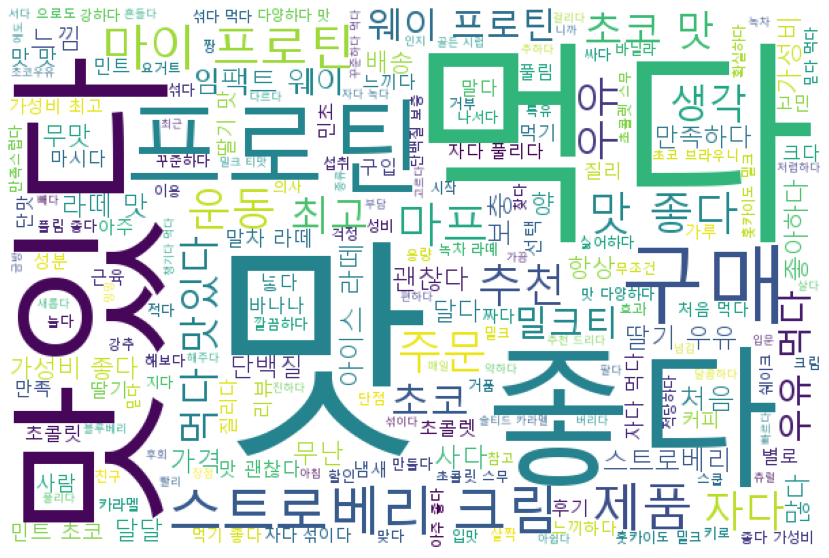

In [51]:
displayWordCloud(data = ' '.join(words_list), width=600, height=400)

원하는 모양에 맞추어 워드클라우드를 생성할 수도 있다. 간단하게 이미지를 지정해주고 넘파이 array로 바꾸어서 mask 파리미터에 넣어주면 된다.

나는 아령 사진을 넣었는데 아령처럼 생기진 않은 것 같다.

In [52]:
from PIL import *
img = Image.open('/content/drive/MyDrive/sentence/아령.jpg')
imgArray = np.array(img)

%matplotlib inline
def displayWordCloud(data = None, backgroundcolor = 'white', width=None, height=None):
    wordcloud = WordCloud(font_path = '/content/drive/MyDrive/sentence/MALGUN.TTF', 
                          background_color = backgroundcolor, 
                          width = width, 
                          height = height,
                          mask=imgArray).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


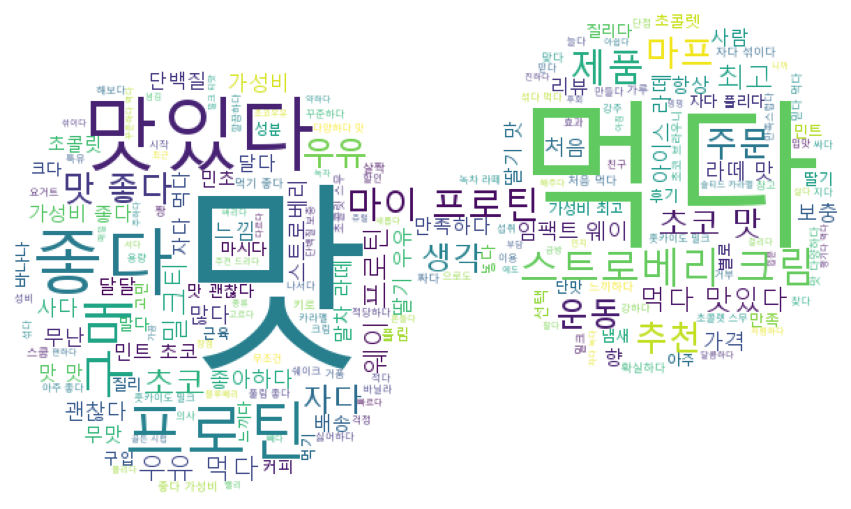

In [53]:
displayWordCloud(data = ' '.join(words_list), width=600, height=400)